<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_2_Uczenie_nadzorowane_cz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

# Szacunki niepewności.

Klasyfikatory z biblioteki Scikit-learn posiadają zdolność do oszacowania niepewności prognoz. W praktyce często poza samą prognozą interesuje nas to, jak pewne jest, że algorytm prawidłowo przypisał klasę próbki. Istnieje wiele sytuacji, w których waga błędu w rzeczywistym zastosowaniu jest bardzo istotna, jednak tym zajmiemy się w innej części.

Istnieją dwie funkcje używane w celu, o którym mowa wyżej: decistion_function i predict_proba. Większość klasyfikatorów pozwala na zastosowanie przynajmniej jednej z nich, z czego wiele z nich - obu. Skorzystamy z GradientBoostingClassifier, który posiada obie funkcje.

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## Funkcja decyzyjna.

Dla klasyfikacji binarnej wartość zwracana przez funkcję decyzyjną jest tablicą jednowymiarową - jedna liczba zmiennoprzecinkowa dla każdej próbki. Ta wartość oznacza stopień, w jakim model uważa, że punkt danych należy do klasy pozytywnej (klasy 1); wartości dodatnie oznaczają preferencję dla klasy pozytywnej, ujemne - negatywnej.

In [3]:
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {clf.decision_function(X_test).shape}")
print(f"clf.decision_function(X_test)[:6]:\n{clf.decision_function(X_test)[:6]}")

X_test.shape: (25, 2)
Decision function shape: (25,)
clf.decision_function(X_test)[:6]:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


Patrząc na same wartości zwracane przez funkcję, możemy wydobyć prognozę.

In [4]:
print(f"Decision function results: {clf.decision_function(X_test) > 0}")
print(f"Predictions: {clf.predict(X_test)}")

Decision function results: [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions: ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


Przy klasyfikacji binarnej klasa negatywna jest zawsze pierwsza w atrybucie classes_, pozytywna zaś drugim.

In [5]:
greater_zero = (clf.decision_function(X_test) > 0).astype(int)
pred = clf.classes_[greater_zero]
print(f"pred. is equal to clf.predict: {np.all(pred == clf.predict(X_test))}")

pred. is equal to clf.predict: True


Zakres funkcji decyzyjnej może być dowolny, zależny od danych i parametrów modelu. Jednak to arbitralne skalowanie sprawia, że wynik funkcji bywa często trudny do interpretacji.

In [6]:
decision_function = clf.decision_function(X_test)
print(f"Decision function minimum: {np.min(decision_function)}")
print(f"Decision function maximum: {np.max(decision_function)}")

Decision function minimum: -7.6909717851019
Decision function maximum: 4.289866423997603


Poniższy wykres, za pomocą kodowania kolorami, wyrysowuje funkcję decyzyjną dla wszystkich punktów, tuż obok granic decyzyjnych (punkty ze zbioru treningowego - koła, ze zbioru testowego - trójkąty).

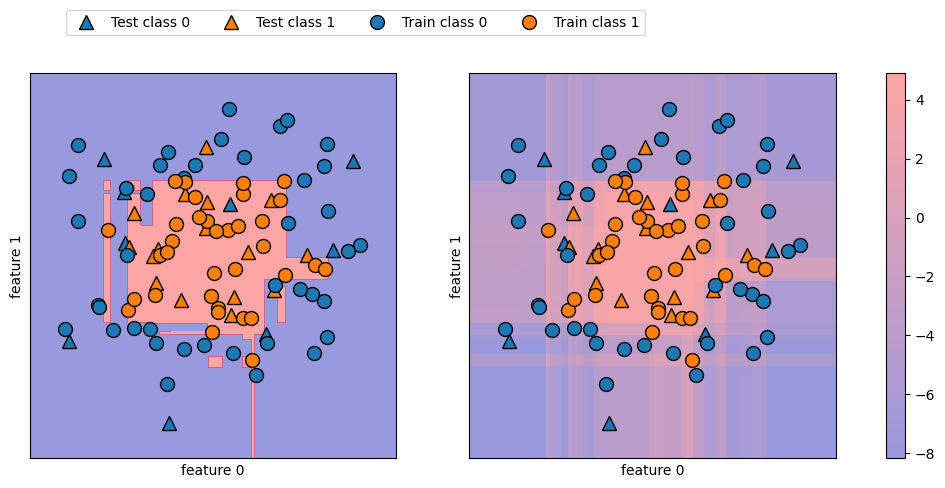

In [7]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(clf, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(clf, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))


## Prognoza prawdopodobieństwa.

Wynik funkcji predict_proba oznacza prawdopodobieństwo dla każdej klasy, dzięki temu jest łatwiejszy do interpretacji niż decision_function. Ma on kształt (liczba próbek, liczba klas). W klasyfikacji binarnej oznacza kolejno oszacowane prawdopodobieństwo klasy pozytywnej i negatywnej. Wynik funkcji - jako że jest to prawdopodobieństwo - zawsze mieści się między 0 a 1, a oba wpisy dla próbki sumują się do 1. Ta klasa, która ma prawdopodobieństwo większe niż 0,5, jest wynikiem predykcji.

In [8]:
print(f"Shape of predict_proba: {clf.predict_proba(X_test).shape}")
print(f"predict_proba: {clf.predict_proba(X_test)[:6]}")

Shape of predict_proba: (25, 2)
predict_proba: [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Dla większości punktów prognozy są względnie pewne. To, jak dobrze niepewność algorytmu odzwierciedla niepewność w danych, jest zależne od danych oraz wybranego i sparametryzowanego modelu. Model bardziej dopasowany jest bardziej skłonny do prognoz pewniejszych, nawet jeżeli są błędne (i odwrotnie).

Istnieje pojęcie modelu skalibrowanego - jest to model, którego raportowana niepewność odpowiada dokładności prognoz (czyli np. 70% pewności odpowiada dokładności na poziomie 0,7).

Poniżej - granice decyzyjne dla uprzednio zdefiniowanego modelu wraz z prawdopodobieństwami klasy pozytywnej.

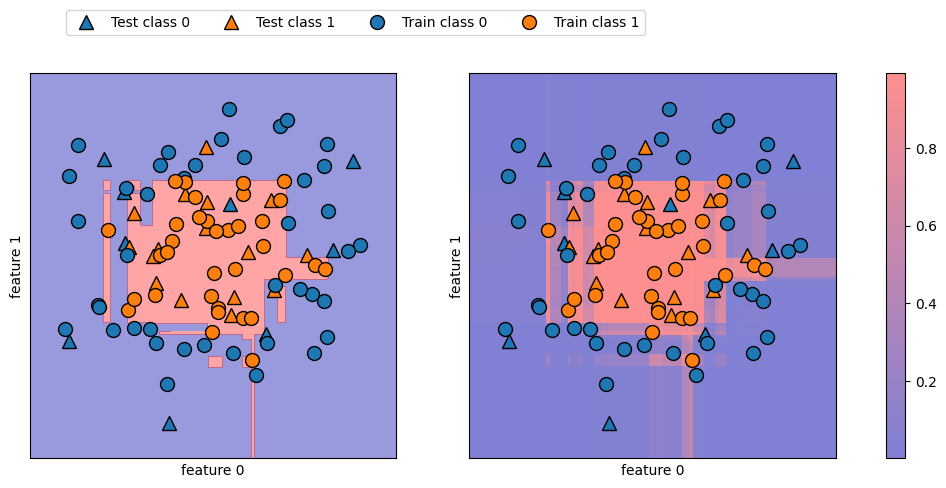

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(clf, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(clf, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

## Niepewność w klasyfikacji wieloklasowej.

Metody, o których mowa powyżej, z powodzeniem stosujemy również w klasyfikacji wieloklasowej. Zastosujmy go na zbiorze danych Iris.

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
clf = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
clf.fit(X_train, y_train)

print(f"Shape of decision function: {clf.decision_function(X_test).shape}")
print(f"Decision function: \n{clf.decision_function(X_test)[:6, :]}")

Shape of decision function: (38, 3)
Decision function: 
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]


Funkcja decyzyjna ma kształt (liczba próbek, liczba klas), a każda kolumna zapewnia swego rodzaju wskazanie pewności dla każdej klasy; wysoki wynik to większe prawdopodobieństwo klasy, niski - niskie prawdopodobieństwo. Na podstawie tych wyników możemy również wyłuskać prognozy.

In [11]:
print(f"Argmax of decision function: {np.argmax(clf.decision_function(X_test), axis=1)}")
print(f"Predictions: {clf.predict(X_test)}")

Argmax of decision function: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


W przypadku prognozy prawdopodobieństwa dane wyjściowe mają ten sam kształt. Ponownie suma prawdopodobieństw klas jest równa 1.

In [12]:
print(f"Shape of predict_proba: {clf.predict_proba(X_test).shape}")
print(f"predict_proba: \n{clf.predict_proba(X_test)[:6, :]}")
print(f"Sum over classes: {clf.predict_proba(X_test)[:6, :].sum(axis=1)}")

Shape of predict_proba: (38, 3)
predict_proba: 
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sum over classes: [1. 1. 1. 1. 1. 1.]


Odzyskujemy prognozy z maksymalnej wartości funkcji predict_proba.

In [13]:
print(f"Argmax of predict_proba: {np.argmax(clf.predict_proba(X_test), axis=1)}")
print(f"Predictions: {clf.predict(X_test)}")

Argmax of predict_proba: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


## Podsumowanie.

Funkcje predict_proba i decision_function mają zatem - z wyjątkiem decision_function w klasyfikacji binarnej - zawsze kształt równy (liczba próbek, liczba klas). Możliwe jest odzyskanie prognozy poprzez obliczenie argmax w kolumnach dla wyników obu funkcji. Dla porównania wyników predykcji z wynikami obydwu ww. funkcji, warto użyć atrybutu classes_ klasyfikatora, aby uzyskać rzeczywiste nazwy klas.

In [14]:
from sklearn.linear_model import LogisticRegression
named_target = iris.target_names[y_train]
logreg = LogisticRegression()
logreg.fit(X_train, named_target)
print(f"Unique classes in training data: {logreg.classes_}")
print(f"Predictions:\n{logreg.predict(X_test)[:10]}")
argmax_dec_func = np.argmax(clf.decision_function(X_test), axis=1)
print(f"Argmax of decision function:\n{argmax_dec_func[:10]}")
print(f"argmax combined with classes_:\n{logreg.classes_[argmax_dec_func][:10]}")

Unique classes in training data: ['setosa' 'versicolor' 'virginica']
Predictions:
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_:
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
